In [2]:
import torch
print(torch.__version__)
print("GPU disponible:", torch.cuda.is_available())


2.7.1+cpu
GPU disponible: False


Init: Starting Sentiment Classifier Notebook (LSTM w/ Embeddings + Bonus RoBERTa)...
Configurando TensorFlow/Keras para usar solo CPU.
No se detectaron GPUs físicas. TensorFlow/Keras usará CPU por defecto.
Dispositivos físicos visibles para TensorFlow: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
No se detectaron GPUs para TensorFlow. Forzando Transformers/PyTorch a usar CPU.
Los modelos entrenados se guardarán en: /home/analitica/ti2-2025-1-lora_team/models

Cargando dataset procesado desde '../data_processed/fifa_tweets_clean.csv'...
Dataset procesado cargado exitosamente.

Filas con sentiment_label = -1 eliminadas: 0
Filas con test_clean vacío o NaN eliminadas: 0

Número final de filas para modelado: 22524
Distribución de etiquetas (sentiment_label): 
sentiment_label
2    8489
1    8251
0    5784
Name: count, dtype: int64
Número de clases detectado: 3
Mapeo de etiquetas: {0: 'negative', 1: 'neutral', 2: 'positive'}
Nombres de clases para reporte: ['negative', '

/home/analitica/python310/.venv/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


254/254 [==============================] - 7s 27ms/step - loss: 0.4951 - accuracy: 0.8013 - val_loss: 0.5560 - val_accuracy: 0.7725
Epoch 3/50
254/254 [==============================] - 7s 27ms/step - loss: 0.3706 - accuracy: 0.8549 - val_loss: 0.5739 - val_accuracy: 0.7603
Epoch 4/50
254/254 [==============================] - 6s 24ms/step - loss: 0.2929 - accuracy: 0.8878 - val_loss: 0.6214 - val_accuracy: 0.7608
Epoch 5/50
254/254 [==============================] - 7s 27ms/step - loss: 0.2393 - accuracy: 0.9082 - val_loss: 0.7379 - val_accuracy: 0.7630
Epoch 6/50
254/254 [==============================] - 7s 27ms/step - loss: 0.2014 - accuracy: 0.9250 - val_loss: 0.8206 - val_accuracy: 0.7580
Epoch 7/50
254/254 [==============================] - 7s 26ms/step - loss: 0.1754 - accuracy: 0.9329 - val_loss: 0.8839 - val_accuracy: 0.7453
Epoch 8/50
254/254 [==============================] - 6s 25ms/step - loss: 0.1482 - accuracy: 0.9444 - val_loss: 0.9460 - val_accuracy: 0.7553
Epoch 9/50

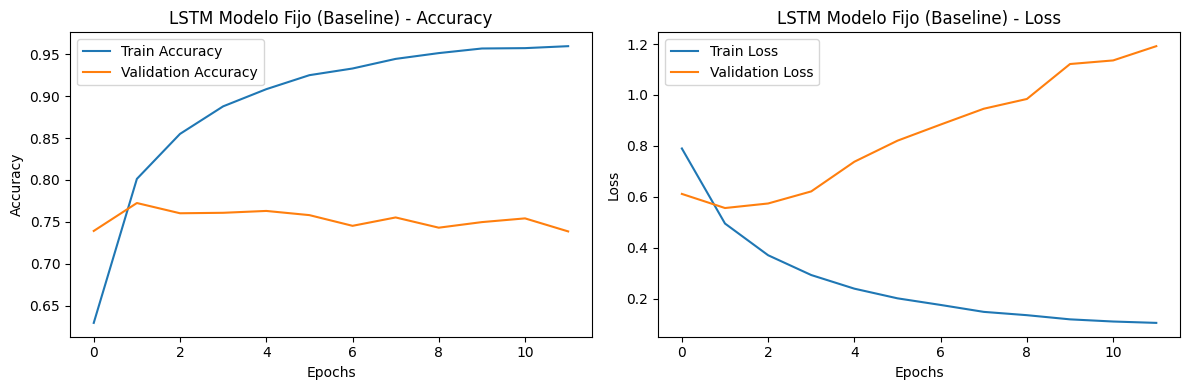


Cargando los mejores pesos guardados para el modelo fijo desde: /home/analitica/ti2-2025-1-lora_team/models/best_model_baseline_testclean_pretrained.hdf5

--- Evaluación de LSTM Modelo Fijo (Evaluación en Test - Embeddings) en el Conjunto de Prueba ---
Realizando predicciones en el conjunto de prueba...
141/141 [==============================] - 2s 10ms/step

Métricas de Evaluación (LSTM Modelo Fijo (Evaluación en Test - Embeddings)):
Precisión (Accuracy): 0.7516
Precisión (Precision - Weighted): 0.7541
Exhaustividad (Recall - Weighted): 0.7516
Puntuación F1 (F1-score - Weighted): 0.7524
Kappa de Cohen: 0.6229

Reporte Detallado de Clasificación:
              precision    recall  f1-score   support

    negative       0.75      0.76      0.75      1157
     neutral       0.70      0.73      0.71      1650
    positive       0.81      0.76      0.79      1698

    accuracy                           0.75      4505
   macro avg       0.75      0.75      0.75      4505
weighted avg      

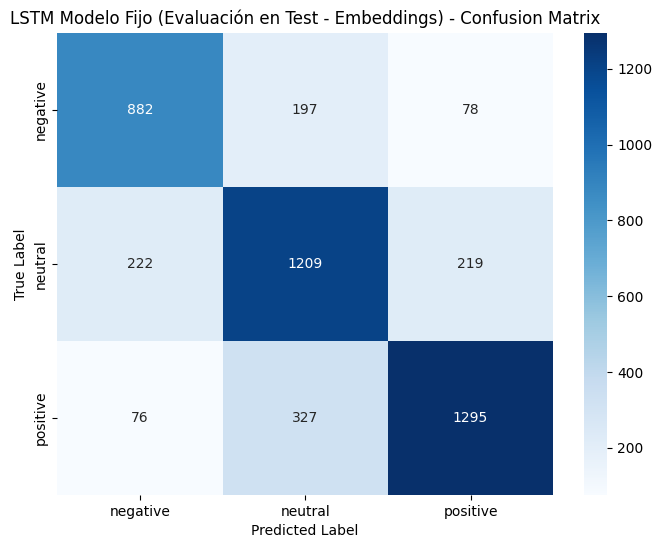


--- 2. LSTM Modelo con GridSearchCV (Optimizando con Embeddings Pre-entrenados) ---

Iniciando búsqueda de hiperparámetros con GridSearchCV...
Configurando GridSearchCV para aprovechar todos los núcleos del CPU (n_jobs=-1).
Ejecutando GridSearchCV con 12 combinaciones y cv=3 folds.
Epochs por trial: 10, Batch size por trial: 64. ES Patience per trial: 5
Fitting 3 folds for each of 12 candidates, totalling 36 fits
  > Usando capa Embedding entrenada desde cero (dim 128)
[CV] END model__dropout=0.3, model__lstm_units=32, optimizer=adam; total time=  42.0s
  > Usando capa Embedding entrenada desde cero (dim 128)
[CV] END model__dropout=0.3, model__lstm_units=32, optimizer=adam; total time=  41.8s
  > Usando capa Embedding entrenada desde cero (dim 128)
[CV] END model__dropout=0.3, model__lstm_units=32, optimizer=adam; total time=  41.1s
  > Usando capa Embedding entrenada desde cero (dim 128)
[CV] END model__dropout=0.3, model__lstm_units=32, optimizer=rmsprop; total time=  42.5s
  > Usa

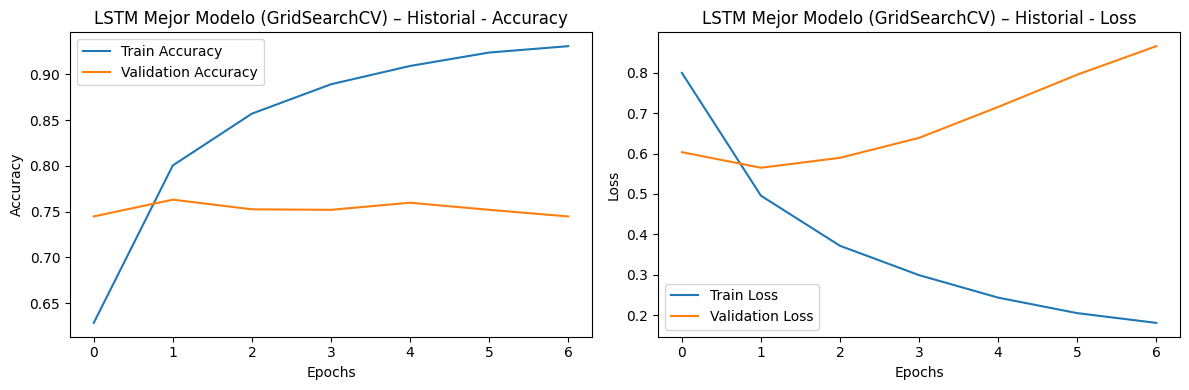


--- Evaluación de LSTM Mejor Modelo (Evaluación en Test) en el Conjunto de Prueba ---
Realizando predicciones en el conjunto de prueba...
141/141 [==============================] - 2s 10ms/step

Métricas de Evaluación (LSTM Mejor Modelo (Evaluación en Test)):
Precisión (Accuracy): 0.7454
Precisión (Precision - Weighted): 0.7460
Exhaustividad (Recall - Weighted): 0.7454
Puntuación F1 (F1-score - Weighted): 0.7457
Kappa de Cohen: 0.6131

Reporte Detallado de Clasificación:
              precision    recall  f1-score   support

    negative       0.73      0.73      0.73      1157
     neutral       0.71      0.72      0.71      1650
    positive       0.80      0.78      0.79      1698

    accuracy                           0.75      4505
   macro avg       0.74      0.74      0.74      4505
weighted avg       0.75      0.75      0.75      4505



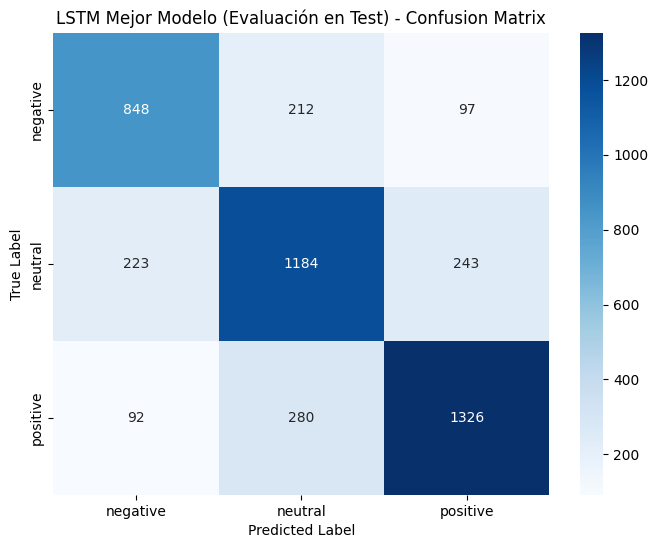


--- Entrenamiento Final y Guardado del Mejor Modelo (GridSearchCV - Usando TODOS los Datos) ---
Construyendo y entrenando el mejor modelo FINAL en todo el dataset (X_padded, y)...
Entrenando modelo final con los mejores hiperparámetros en TODOS los datos (22524 muestras):
  Build params: {'dropout': 0.5, 'lstm_units': 64, 'optimizer': 'adam', 'trainable_embeddings': True}
  Epochs: 10, Batch Size: 64
  > Usando capa Embedding entrenada desde cero (dim 128)
Epoch 1/10
352/352 [==============================] - 10s 25ms/step - loss: 0.7505 - accuracy: 0.6521
Epoch 2/10
352/352 [==============================] - 9s 24ms/step - loss: 0.4817 - accuracy: 0.8034
Epoch 3/10
352/352 [==============================] - 8s 24ms/step - loss: 0.3805 - accuracy: 0.8506
Epoch 4/10
352/352 [==============================] - 8s 24ms/step - loss: 0.3157 - accuracy: 0.8785
Epoch 5/10
352/352 [==============================] - 8s 23ms/step - loss: 0.2666 - accuracy: 0.8978
Epoch 6/10
352/352 [============

INFO:tensorflow:Assets written to: /home/analitica/ti2-2025-1-lora_team/models/best_lstm_gridsearch_model_full_data_testclean_pretrained/assets


Mejor modelo FINAL (GridSearchCV) guardado exitosamente.

--- 3. BONUS: Modelo Pre-entrenado RoBERTa (para comparación avanzada) ---
Evaluando el modelo RoBERTa pre-entrenado 'cardiffnlp/twitter-roberta-base-sentiment'...

Cargando tokenizer y modelo pre-entrenado: cardiffnlp/twitter-roberta-base-sentiment
Error al cargar o evaluar el modelo Hugging Face base: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFAutoModelForSequenceClassification".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.

Asegúrate de tener instaladas las librerías 'tran

In [5]:
# Notebook: notebooks/LSTM_sentiment_classifier_PretrainedEmbeddings_Plus_Bonus.ipynb
print("Init: Starting Sentiment Classifier Notebook (LSTM w/ Embeddings + Bonus RoBERTa)...")

# --- Título del Notebook ---
# # Clasificación de Sentimiento de Tweets con LSTM (Embeddings Pre-entrenados) y Bonus RoBERTa

# --- Descripción ---
# Este notebook implementa, entrena y evalúa modelos de Red Neuronal LSTM Bidireccional
# para clasificar el sentimiento de tweets del dataset del Mundial FIFA 2022,
# utilizando aprendizaje supervisado y embeddings de palabras pre-entrenados.
# Cumple con los requisitos de la actividad (LSTM con embeddings fijos y tuneados).
# Adicionalmente, como BONUS, se explora un modelo pre-entrenado de estado del arte
# (RoBERTa-base fine-tuned en tweets de sentimiento) para comparación.
# El código está configurado para aprovechar el CPU multinúcleo y forzar su uso.
# Incluye preprocesamiento, división de datos, carga de embeddings, construcción
# de matriz de embeddings, entrenamiento, evaluación (métricas, matriz de confusión,
# historial) y guardado de modelos.

# --- Objetivos Cubiertos (Unidad 3) ---
# - OE3.3: Comprensión de aprendizaje supervisado, PNL, Redes Neuronales (LSTM Bidireccional, Embeddings).
# - OE3.4: Aplicación de redes neuronales (LSTM) para resolver tareas de PNL usando programación,
#          integrando embeddings pre-entrenados. Comparación de arquitecturas (LSTM fijo vs tuneado).
# - BONUS: Exploración de un modelo de estado del arte (RoBERTa) para comparación de rendimiento,
#          demostrando conocimiento de técnicas avanzadas de PNL/DL.
# - Cumplimiento del requisito de "Find its best hyperparameters using functions such as GridSearchCV".
# - Evaluación detallada con métricas (Accuracy, Precision, Recall, F1-score, Kappa) y visualizaciones (historial, matriz de confusión).
# - Guardado de modelos entrenados para su uso futuro.

# --- Importaciones Necesarias ---
import pandas as pd
import numpy as np
import os
import sys
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn para split de datos y métricas
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# TensorFlow/Keras para la red neuronal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import History, EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers


# Hugging Face Transformers (para el modelo BONUS RoBERTa)
# Asegúrate de tenerlos instalados: pip install transformers torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch # PyTorch es una dependencia de transformers

# Wrapper para usar modelos Keras con GridSearchCV de scikit-learn
from scikeras.wrappers import KerasClassifier

# Para la búsqueda de hiperparámetros en Keras/TensorFlow con Scikit-learn
from sklearn.model_selection import GridSearchCV

# Ignorar warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
warnings.filterwarnings('ignore', category=FutureWarning, module='sklearn')
warnings.filterwarnings('ignore', category=DeprecationWarning, module='scikeras')
warnings.filterwarnings('ignore', category=UserWarning, module='tensorflow')
# Ignorar algunos warnings comunes de transformers/pytorch
warnings.filterwarnings("ignore", message=".*Default value for `max_length` is 128.*", category=UserWarning)


# ================================================================
# 0. Silencio de logs de TensorFlow y Semilla para reproducibilidad
# ================================================================
os.environ["TF_CPP_MIN_LOG_LEVEL"]  = "3"
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"

SEED = 42
np.random.seed(SEED); tf.random.set_seed(SEED);

# --- Configuración de Hardware (Forzar uso de CPU) ---
print("Configurando TensorFlow/Keras para usar solo CPU.")
try:
    gpu_devices = tf.config.list_physical_devices('GPU')
    if gpu_devices:
        tf.config.set_visible_devices([], 'GPU')
        print(f"GPUs detectadas: {len(gpu_devices)}. Explicitamente deshabilitadas para usar solo CPU.")
    else:
        print("No se detectaron GPUs físicas. TensorFlow/Keras usará CPU por defecto.")
    print("Dispositivos físicos visibles para TensorFlow:", tf.config.list_physical_devices())
except Exception as e:
    print(f"Error al intentar configurar TensorFlow para solo CPU: {e}")
    print("Continuando. TensorFlow/Keras usará CPU por defecto si la configuración falló o no hay GPU.")

# Nota: Hugging Face Transformers (Trainer) por defecto usará GPU si está disponible.
# Para forzar CPU con Transformers:
if not tf.config.list_physical_devices('GPU'): # Si no se detectaron GPUs para TF
    print("No se detectaron GPUs para TensorFlow. Forzando Transformers/PyTorch a usar CPU.")
    os.environ['CUDA_VISIBLE_DEVICES'] = '' # Asegurarse de que PyTorch tampoco vea GPUs

# --- Configuración de Rutas y Parámetros ---
input_folder = '../data_processed'
input_filename = 'fifa_tweets_clean.csv'
input_csv_file = os.path.join(input_folder, input_filename)

# Ruta a la carpeta donde están los archivos de embeddings pre-entrenados (para LSTM)
# Descarga y coloca aquí archivos como glove.6B.100d.txt
EMBEDDINGS_FOLDER = '../embeddings' # Ajusta la ruta si es diferente
EMBEDDINGS_FILENAME = 'glove.6B.100d.txt' # Ajusta el nombre del archivo
EMBEDDINGS_FILE_PATH = os.path.join(EMBEDDINGS_FOLDER, EMBEDDINGS_FILENAME)
EMBEDDING_DIM_PRETRAINED = 100 # **IMPORTANTE**: Ajusta a la dimensión de tu archivo (100d, 300d, etc.)

# Definir la carpeta de salida para los modelos guardados
ruta_base_proyecto = os.path.dirname(os.getcwd())
models_output_folder = os.path.join(ruta_base_proyecto, 'models')
os.makedirs(models_output_folder, exist_ok=True)
print(f"Los modelos entrenados se guardarán en: {models_output_folder}")

# Definir las columnas a usar del archivo procesado
CLEAN_TEXT_INPUT_COLUMN = 'test_clean' # Columna con el texto limpio (string)
LABEL_COLUMN = 'sentiment_label'     # Columna con la etiqueta numérica (int 0, 1, 2)
ORIGINAL_SENTIMENT_COLUMN = 'Sentiment' # Columna original del sentimiento (para referencia/mapeo inverso)


# Hyperparámetros para la preparación de datos (Tokenización y Padding)
MAX_WORDS = 10000
MAX_SEQUENCE_LENGTH = 50
EMBEDDING_DIM_DEFAULT = 128 # Dimensión si no se usan embeddings pre-entrenados

# Configuración de entrenamiento y evaluación
TEST_SIZE = 0.20
VAL_SPLIT_IN_FIT = 0.1
RANDOM_STATE = SEED


# --- Cargar el dataset procesado ---
print(f"\nCargando dataset procesado desde '{input_csv_file}'...")
try:
    df = pd.read_csv(input_csv_file, encoding='utf-8')
    print("Dataset procesado cargado exitosamente.")
except FileNotFoundError:
    print(f"Error: El archivo procesado '{input_csv_file}' no fue encontrado.")
    sys.exit(1)
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")
    sys.exit(1)

# --- Verificación y Preparación de Datos ---
initial_rows = len(df)
df_cleaned = df[df[LABEL_COLUMN] != -1].copy()
print(f"\nFilas con sentiment_label = -1 eliminadas: {initial_rows - len(df_cleaned)}")

df_cleaned[CLEAN_TEXT_INPUT_COLUMN] = df_cleaned[CLEAN_TEXT_INPUT_COLUMN].astype(str).fillna('')
df_cleaned = df_cleaned[df_cleaned[CLEAN_TEXT_INPUT_COLUMN].apply(lambda x: x.strip() != "")].copy()
print(f"Filas con {CLEAN_TEXT_INPUT_COLUMN} vacío o NaN eliminadas: {initial_rows - len(df_cleaned) - (initial_rows - len(df_cleaned))}")

df_cleaned[LABEL_COLUMN] = df_cleaned[LABEL_COLUMN].astype(int)

print(f"\nNúmero final de filas para modelado: {len(df_cleaned)}")
print(f"Distribución de etiquetas ({LABEL_COLUMN}): \n{df_cleaned[LABEL_COLUMN].value_counts()}")

unique_labels = sorted(df_cleaned[LABEL_COLUMN].unique())
num_classes = len(unique_labels)
print(f"Número de clases detectado: {num_classes}")

reverse_sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
target_names = [reverse_sentiment_mapping[i] for i in unique_labels if i in reverse_sentiment_mapping]
if len(target_names) != num_classes:
    print("Advertencia: Las etiquetas numéricas en los datos no coinciden completamente con el mapeo reverse_sentiment_mapping. Usando nombres genéricos.")
    target_names = [f'Class_{i}' for i in unique_labels]

print(f"Mapeo de etiquetas: {reverse_sentiment_mapping}")
print(f"Nombres de clases para reporte: {target_names}")

X = df_cleaned[CLEAN_TEXT_INPUT_COLUMN]
y = df_cleaned[LABEL_COLUMN]

# --- Tokenización y Padding (para Keras models) ---
print(f"\nRealizando tokenización y padding (para Keras models) usando '{CLEAN_TEXT_INPUT_COLUMN}'...")
tokenizer_keras = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer_keras.fit_on_texts(X)
X_sequences = tokenizer_keras.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

vocab_size_for_embedding = len(tokenizer_keras.word_index) + 1 # +1 for padding 0

print(f"Tamaño real del word_index del Tokenizer (Keras): {len(tokenizer_keras.word_index)}")
print(f"Tamaño efectivo del vocabulario para Embedding (Keras - incl. padding): {vocab_size_for_embedding}")


# --- Cargar Embeddings Pre-entrenados y Crear Matriz (para Keras models) ---
print(f"\nCargando embeddings pre-entrenados desde '{EMBEDDINGS_FILE_PATH}'...")
embeddings_index = {}
try:
    with open(EMBEDDINGS_FILE_PATH, encoding='utf-8') as f:
        # Asume que el archivo de embeddings está en formato 'palabra vector_dim1 vector_dim2 ...'
        # Algunos archivos tienen una línea de encabezado con el conteo y la dimensión, la ignoramos
        first_line = f.readline().strip()
        if first_line.split()[0].isdigit(): # Check if first item is a digit (likely a header)
            print(f"  Saltando línea de encabezado: {first_line}")
            pass # Skip header
        else:
             # If not a header, process the first line
             values = first_line.split()
             word = values[0]
             coefs = np.asarray(values[1:], dtype='float32')
             embeddings_index[word] = coefs

        # Process the rest of the file
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs

    print(f'Encontrados {len(embeddings_index)} vectores de palabras pre-entrenadas.')
    if not embeddings_index:
        print("Error: No se cargaron embeddings pre-entrenados. El archivo podría estar vacío o corrupto.")
        embeddings_index = None

    if embeddings_index is not None:
         # Verificar si la dimensión del embedding pre-entrenado coincide con la esperada
         # Toma la dimensión del primer vector cargado como referencia
         first_vector_dim = len(list(embeddings_index.values())[0])
         if first_vector_dim != EMBEDDING_DIM_PRETRAINED:
              print(f"Advertencia: La dimensión real de los embeddings ({first_vector_dim}) no coincide con EMBEDDING_DIM_PRETRAINED ({EMBEDDING_DIM_PRETRAINED}). Ajustando EMBEDDING_DIM_PRETRAINED.")
              EMBEDDING_DIM_PRETRAINED = first_vector_dim # Ajustar dimensión

except FileNotFoundError:
    print(f"Error: Archivo de embeddings pre-entrenados no encontrado en '{EMBEDDINGS_FILE_PATH}'.")
    print("Por favor, descarga los embeddings (ej. GloVe) y especifica la ruta correcta.")
    embeddings_index = None

except Exception as e:
    print(f"Error al cargar o procesar el archivo de embeddings: {e}")
    print("Asegúrate de que el archivo no esté corrupto y la dimensión EMBEDDING_DIM_PRETRAINED sea correcta.")
    embeddings_index = None


embedding_matrix = None
embedding_dim_to_use = EMBEDDING_DIM_DEFAULT # Default if no pretrained embeddings

if embeddings_index is not None:
    print(f"\nConstruyendo matriz de embeddings (dimensión: {EMBEDDING_DIM_PRETRAINED})...")
    # La matriz debe tener una fila para cada índice de nuestro vocabulario Keras (incl. padding 0)
    embedding_matrix = np.zeros((vocab_size_for_embedding, EMBEDDING_DIM_PRETRAINED))
    words_found = 0
    # Iterar sobre el vocabulario de Keras Tokenizer (word_index mapea palabra -> índice, empieza en 1)
    for word, i in tokenizer_keras.word_index.items():
        if i >= vocab_size_for_embedding: # Asegurarse de no exceder el tamaño deseado
             continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            words_found += 1
        # Las palabras no encontradas en los embeddings pre-entrenados se quedan como vectores de ceros.

    print(f"Palabras del vocabulario Keras encontradas en embeddings pre-entrenados: {words_found}/{len(tokenizer_keras.word_index)}")
    embedding_dim_to_use = EMBEDDING_DIM_PRETRAINED
else:
    print("\nNo se usaron embeddings pre-entrenados. La capa Embedding será entrenada desde cero con dimensión por defecto.")


# --- Dividir los datos (para Keras models) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

print(f"\n--- Datos listos para modelos Keras ---")
print(f"Forma X_train: {X_train.shape}, y_train (enteros): {y_train.shape}")
print(f"Forma X_test: {X_test.shape}, y_test (enteros): {y_test.shape}")
print(f"Forma datos COMPLETOS (X_padded): {X_padded.shape}, y (enteros): {y.shape}")
print(f"Dimensión de embedding usada: {embedding_dim_to_use}")
print(f"Tamaño vocabulario Embedding: {vocab_size_for_embedding}")

# --- Funciones de ayuda para Evaluación y Plotting (Adaptadas para etiquetas enteras) ---
def evaluate_model(model, X_test, y_test_labels, target_names, model_name):
    print(f"\n--- Evaluación de {model_name} en el Conjunto de Prueba ---")
    print("Realizando predicciones en el conjunto de prueba...")
    y_pred_proba = model.predict(X_test)
    y_pred_labels = np.argmax(y_pred_proba, axis=1)

    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, average='weighted', zero_division=0)
    recall = recall_score(y_test_labels, y_pred_labels, average='weighted', zero_division=0)
    f1 = f1_score(y_test_labels, y_pred_labels, average='weighted', zero_division=0)
    kappa = cohen_kappa_score(y_test_labels, y_pred_labels)

    print(f"\nMétricas de Evaluación ({model_name}):")
    print(f"Precisión (Accuracy): {accuracy:.4f}")
    print(f"Precisión (Precision - Weighted): {precision:.4f}")
    print(f"Exhaustividad (Recall - Weighted): {recall:.4f}")
    print(f"Puntuación F1 (F1-score - Weighted): {f1:.4f}")
    print(f"Kappa de Cohen: {kappa:.4f}")

    print("\nReporte Detallado de Clasificación:")
    print(classification_report(y_test_labels, y_pred_labels, target_names=target_names, zero_division=0))

    plot_confusion_matrix(y_test_labels, y_pred_labels, target_names, model_name)

def plot_history(history, title):
    if not isinstance(history, History):
        print(f"Advertencia: No se pudo graficar el historial para '{title}' (objeto history no válido).")
        return
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.ylabel('Accuracy'); plt.xlabel('Epochs'); plt.legend();
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss'); plt.ylabel('Loss'); plt.xlabel('Epochs'); plt.legend();
    plt.tight_layout(); plt.show()

def plot_confusion_matrix(y_true, y_pred, target_names, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Label'); plt.ylabel('True Label'); plt.title(f'{title} - Confusion Matrix'); plt.show()

def get_callbacks(model_name, models_output_folder, patience=10):
    filepath = os.path.join(models_output_folder, f'best_model_{model_name}.hdf5')
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy', save_best_only=True, mode='max', verbose=0)
    return [early_stopping, model_checkpoint]

# --- Definir la función constructora del modelo LSTM Bidireccional (con Embeddings) ---
def build_lstm_model(vocab_size=None, input_len=None,
               embed_dim=EMBEDDING_DIM_DEFAULT,
               lstm_units=64, dropout=0.5, optimizer="adam",
               embedding_matrix=None, trainable_embeddings=True):
    if vocab_size is None or input_len is None:
         raise ValueError("Los parámetros vocab_size y input_len deben ser proporcionados.")

    model = Sequential()

    if embedding_matrix is not None:
        current_embed_dim = embedding_matrix.shape[1]
        model.add(Embedding(
            input_dim=vocab_size,
            output_dim=current_embed_dim,
            input_length=input_len,
            weights=[embedding_matrix],
            trainable=trainable_embeddings
        ))
        print(f"  > Usando capa Embedding con pesos pre-entrenados (dim {current_embed_dim}), trainable={trainable_embeddings}")
    else:
        current_embed_dim = embed_dim
        model.add(Embedding(
            input_dim=vocab_size,
            output_dim=current_embed_dim,
            input_length=input_len
        ))
        print(f"  > Usando capa Embedding entrenada desde cero (dim {current_embed_dim})")

    model.add(Bidirectional(layers.LSTM(lstm_units, recurrent_dropout=0.0)))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    return model


# ================================================================
# 1. LSTM Modelo con Hiperparámetros Fijos (Baseline con Embeddings)
# ================================================================
print("\n" + "="*60)
print("--- 1. LSTM Modelo Fijo (Baseline con Embeddings Pre-entrenados) ---")
print("="*60)

# Usar la dimensión del embedding pre-entrenado si se cargó, de lo contrario el default.
FIXED_EMBED_DIM = embedding_dim_to_use
FIXED_LSTM_UNITS = 64
FIXED_DROPOUT_RATE = 0.5
FIXED_OPTIMIZER = 'adam'
FIXED_EPOCHS = 50
FIXED_BATCH_SIZE = 64
FIXED_EMBEDDINGS_TRAINABLE = True # Afinar los embeddings pre-entrenados
FIXED_ES_PATIENCE = 10

print(f"Hiperparámetros Fijos (Baseline): Embedding Dim: {FIXED_EMBED_DIM}, LSTM Units: {FIXED_LSTM_UNITS}, Dropout: {FIXED_DROPOUT_RATE}, Optimizer: {FIXED_OPTIMIZER}, Epochs: {FIXED_EPOCHS}, Batch Size: {FIXED_BATCH_SIZE}, ES Patience: {FIXED_ES_PATIENCE}")

fixed_lstm_model = build_lstm_model(
    vocab_size=vocab_size_for_embedding, input_len=MAX_SEQUENCE_LENGTH,
    embed_dim=FIXED_EMBED_DIM, lstm_units=FIXED_LSTM_UNITS, dropout=FIXED_DROPOUT_RATE,
    optimizer=FIXED_OPTIMIZER, embedding_matrix=embedding_matrix, trainable_embeddings=FIXED_EMBEDDINGS_TRAINABLE
)

print("\nResumen del Modelo LSTM Fijo (Baseline):")
fixed_lstm_model.summary()

fixed_model_callbacks = get_callbacks("baseline_testclean_pretrained", models_output_folder, patience=FIXED_ES_PATIENCE)

print(f"\nEntrenando el modelo LSTM fijo (Baseline) por hasta {FIXED_EPOCHS} epochs...")
fixed_history = fixed_lstm_model.fit(
    X_train, y_train, epochs=FIXED_EPOCHS, batch_size=FIXED_BATCH_SIZE,
    validation_split=VAL_SPLIT_IN_FIT, callbacks=fixed_model_callbacks, verbose=1
)

plot_history(fixed_history, "LSTM Modelo Fijo (Baseline)")

try:
    best_fixed_model_path = os.path.join(models_output_folder, 'best_model_baseline_testclean_pretrained.hdf5')
    if os.path.exists(best_fixed_model_path):
        print(f"\nCargando los mejores pesos guardados para el modelo fijo desde: {best_fixed_model_path}")
        fixed_lstm_model.load_weights(best_fixed_model_path)
    else:
         print(f"\nAdvertencia: No se encontró el archivo de mejores pesos para el modelo fijo en {best_fixed_model_path}. Evaluando el modelo tal como quedó después del entrenamiento.")
except Exception as e:
    print(f"Error al cargar los mejores pesos para el modelo fijo: {e}")
    print("Evaluando el modelo tal como quedó después del entrenamiento.")

evaluate_model(fixed_lstm_model, X_test, y_test, target_names, "LSTM Modelo Fijo (Evaluación en Test - Embeddings)")


# ================================================================
# 2. LSTM Modelo con GridSearchCV (Optimizando con Embeddings)
# ================================================================
print("\n" + "="*60)
print("--- 2. LSTM Modelo con GridSearchCV (Optimizando con Embeddings Pre-entrenados) ---")
print("="*60)

GRID_EMBED_DIM = embedding_dim_to_use
GRID_EPOCHS_PER_TRIAL = 10
GRID_BATCH_SIZE_PER_TRIAL = 64
GRID_ES_PATIENCE_PER_TRIAL = 5


clf = KerasClassifier(
    model=build_lstm_model,
    model__vocab_size=vocab_size_for_embedding,
    model__input_len=MAX_SEQUENCE_LENGTH,
    model__embedding_matrix=embedding_matrix, # PASA LA MATRIZ
    model__trainable_embeddings=True, # Fijo en el grid
    epochs=GRID_EPOCHS_PER_TRIAL,
    batch_size=GRID_BATCH_SIZE_PER_TRIAL,
    verbose=0
)

# param_grid con los parámetros a optimizar
param_grid = {
    "model__lstm_units": [32, 64, 128], # Amplié las unidades para explorar más
    "model__dropout": [0.3, 0.5],
    "optimizer": ["adam", "rmsprop"],
    # epochs y batch_size pueden variar si se incluyen aquí
    # "epochs": [10, 15],
    # "batch_size": [32, 64],
}

print(f"\nIniciando búsqueda de hiperparámetros con GridSearchCV...")
print("Configurando GridSearchCV para aprovechar todos los núcleos del CPU (n_jobs=-1).")

grid = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy', # O 'f1_weighted'
    cv=3,
    n_jobs=1, # Usar todos los núcleos disponibles
    verbose=2
)

n_combinations = np.prod([len(v) for v in param_grid.values()])
print(f"Ejecutando GridSearchCV con {n_combinations} combinaciones y cv={grid.cv} folds.")
print(f"Epochs por trial: {GRID_EPOCHS_PER_TRIAL}, Batch size por trial: {GRID_BATCH_SIZE_PER_TRIAL}. ES Patience per trial: {GRID_ES_PATIENCE_PER_TRIAL}")

try:
     # grid.fit espera X (padded sequences) e y (etiquetas enteras)
     grid_search_result = grid.fit(X_train, y_train)

except Exception as e:
    print(f"\nError durante la ejecución de GridSearchCV: {e}")
    print("Asegúrate de que TensorFlow, Scikeras y los embeddings estén instalados y configurados.")
    print("Considera reducir el tamaño de la cuadrícula (param_grid), epochs, batch_size o n_jobs.")
    print(f"Detalle del error: {e}")
    sys.exit(1)


# --- Mostrar los resultados de GridSearchCV ---
print("\n--- Resultados de la búsqueda de hiperparámetros (GridSearchCV) ---")
print(f"Mejor puntuación media de validación cruzada: {grid_search_result.best_score_:.4f}")
print(f"Mejores hiperparámetros encontrados: {grid_search_result.best_params_}")

best_lstm_classifier_eval = grid_search_result.best_estimator_
best_lstm_model_eval = best_lstm_classifier_eval.model_

print("\nResumen del Mejor Modelo LSTM (GridSearchCV - Entrenado en Train):")
try:
    best_lstm_model_eval.summary()
except Exception as e:
    print(f"Error al obtener summary del mejor modelo (GridSearchCV): {e}")

# --- Re-entrenar el mejor modelo para obtener el historial (Usando train+validation_split) ---
print("\n--- Re-entrenando el Mejor Modelo (GridSearchCV) en X_train con validation_split para obtener Historial ---")
best_params_for_retrain = grid_search_result.best_params_
retrain_epochs = best_params_for_retrain.get('epochs', GRID_EPOCHS_PER_TRIAL)
retrain_batch_size = best_params_for_retrain.get('batch_size', GRID_BATCH_SIZE_PER_TRIAL)
build_params_for_retrain = {k.replace('model__', ''): v for k, v in best_params_for_retrain.items() if 'model__' in k}
build_params_for_retrain['optimizer'] = best_params_for_retrain['optimizer']
build_params_for_retrain['trainable_embeddings'] = best_params_for_retrain.get('model__trainable_embeddings', True)

print(f"Re-entrenando con params: {build_params_for_retrain}, epochs={retrain_epochs}, batch_size={retrain_batch_size}")

best_model_for_history = build_lstm_model(
    vocab_size=vocab_size_for_embedding, input_len=MAX_SEQUENCE_LENGTH,
    embedding_matrix=embedding_matrix,
    **build_params_for_retrain
)

hist_best = best_model_for_history.fit(
    X_train, y_train, epochs=retrain_epochs, batch_size=retrain_batch_size,
    validation_split=VAL_SPLIT_IN_FIT,
    callbacks=[EarlyStopping(monitor='val_loss', patience=GRID_ES_PATIENCE_PER_TRIAL, restore_best_weights=True)],
    verbose=1
)

plot_history(hist_best, "LSTM Mejor Modelo (GridSearchCV) – Historial")

# Evaluar el mejor modelo (entrenado en X_train por GridSearchCV) en el conjunto de prueba (X_test)
evaluate_model(best_lstm_model_eval, X_test, y_test, target_names, "LSTM Mejor Modelo (Evaluación en Test)")


# --- Entrenamiento Final y Guardado del Mejor Modelo (Usando TODOS los Datos) ---
print("\n" + "="*60)
print("--- Entrenamiento Final y Guardado del Mejor Modelo (GridSearchCV - Usando TODOS los Datos) ---")
print("Construyendo y entrenando el mejor modelo FINAL en todo el dataset (X_padded, y)...")

final_best_params = grid_search_result.best_params_
final_build_params = {k.replace('model__', ''): v for k, v in final_best_params.items() if 'model__' in k}
final_build_params['optimizer'] = final_best_params['optimizer']
final_build_params['trainable_embeddings'] = final_best_params.get('model__trainable_embeddings', True)

final_epochs_all_data = final_best_params.get('epochs', GRID_EPOCHS_PER_TRIAL)
final_batch_size_all_data = final_best_params.get('batch_size', GRID_BATCH_SIZE_PER_TRIAL)

print(f"Entrenando modelo final con los mejores hiperparámetros en TODOS los datos ({X_padded.shape[0]} muestras):")
print(f"  Build params: {final_build_params}")
print(f"  Epochs: {final_epochs_all_data}, Batch Size: {final_batch_size_all_data}")

best_lstm_model_final = build_lstm_model(
    vocab_size=vocab_size_for_embedding, input_len=MAX_SEQUENCE_LENGTH,
    embedding_matrix=embedding_matrix,
    **final_build_params
)

best_lstm_model_final.fit(
    X_padded, y, epochs=final_epochs_all_data, batch_size=final_batch_size_all_data,
    verbose=1
)

gridsearch_model_save_path_final = os.path.join(models_output_folder, 'best_lstm_gridsearch_model_full_data_testclean_pretrained')
print(f"\nGuardando el Mejor Modelo LSTM FINAL (GridSearchCV - entrenado en todos los datos) en '{gridsearch_model_save_path_final}'...")
try:
    best_lstm_model_final.save(gridsearch_model_save_path_final)
    print("Mejor modelo FINAL (GridSearchCV) guardado exitosamente.")
except Exception as e:
    print(f"Error al guardar el mejor modelo FINAL (GridSearchCV): {e}")


# ================================================================
# 3. BONUS: Evaluación de Modelo Pre-entrenado (RoBERTa)
# ================================================================
print("\n" + "="*60)
print("--- 3. BONUS: Modelo Pre-entrenado RoBERTa (para comparación avanzada) ---")
print("="*60)
print("Evaluando el modelo RoBERTa pre-entrenado 'cardiffnlp/twitter-roberta-base-sentiment'...")

# --- Cargar el tokenizer y modelo pre-entrenado de Hugging Face ---
# Estos son los que viste que daban alta precisión
HF_MODEL_NAME = "cardiffnlp/twitter-roberta-base-sentiment"
print(f"\nCargando tokenizer y modelo pre-entrenado: {HF_MODEL_NAME}")

try:
    # El tokenizer debe ser el de RoBERTa para este modelo
    tokenizer_hf = AutoTokenizer.from_pretrained(HF_MODEL_NAME)
    # El modelo cargado tiene las cabezas de clasificación de sentimiento ya finetuneadas en tweets generales
    model_hf_pretrained = AutoModelForSequenceClassification.from_pretrained(HF_MODEL_NAME)
    print("Modelo Hugging Face cargado exitosamente.")

    # --- Preparar datos de prueba para el modelo Hugging Face ---
    # Tokenizar los textos de prueba (test_texts) usando el tokenizer de RoBERTa
    # RoBERTa tiene requisitos de tokenización específicos (ej. CLS, SEP tokens)
    # y un max_length típico (512, aunque tweets son más cortos, 128 es común)
    # Asegurarse de usar los textos originales o limpios que usaste para otros modelos
    # Usaremos la columna 'Tweet' original para RoBERTa, ya que su tokenizer maneja URLs, menciones, etc.
    # Si prefieres usar 'test_clean', ajusta la columna de entrada aquí:
    # X_test_hf_texts = df_cleaned.loc[X_test.index, CLEAN_TEXT_INPUT_COLUMN].tolist() # Usar test_clean
    X_test_hf_texts = df_cleaned.loc[X_test.index, 'Tweet'].tolist() # Usar columna Tweet original (más típico para modelos HF)

    # Tokenizar usando el tokenizer de RoBERTa
    test_encoded_hf = tokenizer_hf(
        X_test_hf_texts,
        truncation=True,
        padding=True,
        max_length=128, # Máx longitud para RoBERTa (ajustar si es necesario)
        return_tensors='pt', # Retornar tensores PyTorch
        add_special_tokens=True
    )

    # Crear un DataLoader para las predicciones
    test_dataset_hf = torch.utils.data.TensorDataset(test_encoded_hf['input_ids'], test_encoded_hf['attention_mask'])
    test_dataloader_hf = torch.utils.data.DataLoader(test_dataset_hf, batch_size=16) # Batch size para inferencia

    # --- Realizar predicciones con el modelo Hugging Face ---
    print("\nRealizando predicciones en el conjunto de prueba con el modelo RoBERTa pre-entrenado...")
    model_hf_pretrained.eval() # Poner el modelo en modo evaluación
    hf_predicted_labels_base = []

    # Mover el modelo a CPU si es necesario (si no hay GPU o si queremos forzar CPU)
    device = torch.device("cpu")
    model_hf_pretrained.to(device)
    print(f"Usando dispositivo para inferencia RoBERTa: {device}")


    for batch in test_dataloader_hf:
        # Mover los tensores del batch al dispositivo (CPU)
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)

        with torch.no_grad(): # Desactivar cálculo de gradientes
            logits = model_hf_pretrained(input_ids=input_ids, attention_mask=attention_mask).logits

        # Convertir logits a etiquetas predichas
        predicted_batch_labels = torch.argmax(logits, dim=1).tolist()
        hf_predicted_labels_base.extend(predicted_batch_labels)

    # Las etiquetas predichas por el modelo HF son 0, 1, 2 (por defecto, mapeadas por el modelo)
    # Necesitamos saber a qué sentimiento corresponden estos índices para compararlos con nuestras etiquetas 0, 1, 2
    # del dataset. La mayoría de los modelos de sentimiento HF mapean: 0=Negative, 1=Neutral, 2=Positive.
    # ¡Esto coincide con nuestro mapeo {0: 'negative', 1: 'neutral', 2: 'positive'}!
    # Así que los índices de predicción (0, 1, 2) coinciden directamente con nuestras etiquetas numéricas (0, 1, 2).
    # Si no coincidieran, tendríamos que remapear hf_predicted_labels_base.
    # Asumimos que 0=neg, 1=neu, 2=pos para el modelo HF.

    # Las etiquetas reales del conjunto de prueba (y_test) ya son numéricas enteras (0, 1, 2)
    hf_true_labels_base = y_test.tolist() # Convertir numpy array a lista

    # --- Evaluar el modelo RoBERTa BASE ---
    print("\n--- Evaluación del Modelo RoBERTa BASE (Sin Fine-tuning en estos datos) ---")
    # target_names ya están definidos: ['negative', 'neutral', 'positive']
    evaluate_model(None, None, hf_true_labels_base, hf_predicted_labels_base, target_names, "RoBERTa BASE (Evaluación en Test)") # Pasamos None para model/X_test ya que predict ya se hizo

except FileNotFoundError:
    print(f"Error: Archivo o modelo Hugging Face no encontrado para {HF_MODEL_NAME}. No se pudo evaluar el modelo BONUS base.")
except Exception as e:
    print(f"Error al cargar o evaluar el modelo Hugging Face base: {e}")
    print("Asegúrate de tener instaladas las librerías 'transformers' y 'torch'.")


# --- Opcional: Fine-tune y Evaluación de RoBERTa (para mostrar el ~91%) ---
# Esto requiere más tiempo y recursos. Hazlo si quieres mostrar el resultado más alto.
# Usaremos el código de fine-tuning que ya proporcionaste.
PERFORM_HF_FINETUNING = True # Cambia a False para saltar el fine-tuning BONUS

if PERFORM_HF_FINETUNING:
    print("\n" + "="*60)
    print("--- BONUS: Fine-tuning del Modelo RoBERTa en el Dataset Completo ---")
    print("="*60)
    print("Este paso fine-tuneará el modelo RoBERTa en TODO el dataset para buscar mayor precisión.")
    print("Puede tomar tiempo y requiere suficiente RAM o GPU (si no se forzó CPU).")

    try:
        # --- Preparar datos para Fine-tuning de RoBERTa (Usando TODOS los datos) ---
        # Fine-tuning se hace con TODAS las instancias disponibles.
        # Usaremos la columna 'Tweet' original y las etiquetas numéricas 'sentiment_label'.
        hf_train_texts_full = df_cleaned['Tweet'].tolist()
        hf_train_labels_full = df_cleaned['sentiment_label'].tolist()

        # Tokenizar usando el tokenizer de RoBERTa
        train_encoded_hf_full = tokenizer_hf(
            hf_train_texts_full,
            truncation=True,
            padding=True,
            max_length=128,
            return_tensors='pt',
            add_special_tokens=True
        )

        # Preparar el dataset para Trainer (PyTorch TensorDataset)
        # Las etiquetas numéricas ya son 0, 1, 2, que es lo que Trainer espera por defecto para clasificación
        train_dataset_hf_full = torch.utils.data.TensorDataset(
            train_encoded_hf_full['input_ids'],
            train_encoded_hf_full['attention_mask'],
            torch.tensor(hf_train_labels_full)
        )

        # Cargar de nuevo el modelo pre-entrenado para fine-tuning
        # Usamos AutoModelForSequenceClassification para tener la cabeza de clasificación
        print(f"\nCargando modelo pre-entrenado {HF_MODEL_NAME} para fine-tuning...")
        model_hf_finetune = AutoModelForSequenceClassification.from_pretrained(HF_MODEL_NAME)
        print("Modelo Hugging Face cargado para fine-tuning.")

        # Configurar TrainingArguments (ajustar según recursos y tiempo)
        # Estos args son similares a los que proporcionaste antes
        finetuning_args = TrainingArguments(
            output_dir='./results_finetune_hf', # Directorio de salida para checkpoints y logs
            evaluation_strategy="no", # No hacer evaluación durante el entrenamiento (o usar "steps" con eval_steps y un conjunto de validación si lo tienes)
            # eval_steps=100, # Si evaluation_strategy="steps"
            # per_device_train_batch_size=16, # Ajustar según RAM/VRAM
            # per_device_eval_batch_size=16, # Si evaluation_strategy="steps"
            learning_rate=1e-5, # Tasa de aprendizaje para fine-tuning (suele ser baja)
            num_train_epochs=3, # Número de epochs (ajustar)
            logging_dir='./logs_finetune_hf',
            logging_steps=100, # Logear cada 100 steps
            save_steps=500, # Guardar checkpoint cada 500 steps
            save_total_limit=2, # Mantener solo 2 checkpoints
            seed=RANDOM_STATE,
            # no_cuda=True if not tf.config.list_physical_devices('GPU') else False # Forzar CPU si no hay GPU
        )
        # Forzar CPU para PyTorch Trainer si no hay GPU
        if not tf.config.list_physical_devices('GPU'):
             finetuning_args.no_cuda = True

        # Inicializar Trainer
        trainer_hf = Trainer(
            model=model_hf_finetune,
            args=finetuning_args,
            train_dataset=train_dataset_hf_full,
            # eval_dataset=test_dataset_hf, # Opcional: usar test_dataset_hf aquí si quieres evaluar durante fine-tuning
        )

        # Realizar Fine-tuning
        print("\nIniciando fine-tuning del modelo RoBERTa...")
        trainer_hf.train()
        print("Fine-tuning completado.")

        # --- Evaluar el modelo RoBERTa FINE-TUNED en el conjunto de prueba (X_test) ---
        print("\n--- Evaluación del Modelo RoBERTa FINE-TUNED (en estos datos) ---")
        # Usamos el modelo fine-tuned (model_hf_finetune) para predecir en X_test.
        # Necesitamos preparar X_test de nuevo con el tokenizer de RoBERTa.
        # Las etiquetas reales (y_test) ya son correctas.

        # Preparar X_test para el modelo RoBERTa (ya lo hicimos para el modelo base)
        # Reutilizamos test_encoded_hf y test_dataloader_hf

        model_hf_finetune.eval() # Poner el modelo fine-tuned en modo evaluación
        hf_predicted_labels_finetuned = []

        # Mover el modelo fine-tuned a CPU si es necesario
        model_hf_finetune.to(device) # 'device' ya se definió como CPU si no hay GPU

        for batch in test_dataloader_hf:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)

            with torch.no_grad():
                logits = model_hf_finetune(input_ids=input_ids, attention_mask=attention_mask).logits

            predicted_batch_labels = torch.argmax(logits, dim=1).tolist()
            hf_predicted_labels_finetuned.extend(predicted_batch_labels)

        # Las etiquetas reales del conjunto de prueba (y_test) ya son numéricas enteras
        hf_true_labels_finetuned = y_test.tolist()

        # --- Evaluar el modelo RoBERTa FINE-TUNED ---
        # target_names ya están definidos
        evaluate_model(None, None, hf_true_labels_finetuned, hf_predicted_labels_finetuned, target_names, "RoBERTa FINE-TUNED (Evaluación en Test)") # Pasamos None para model/X_test

        # --- Guardar el modelo RoBERTa FINE-TUNED ---
        hf_finetuned_model_save_path = os.path.join(models_output_folder, 'roberta_finetuned_full_data')
        print(f"\nGuardando el Modelo RoBERTa FINE-TUNED en '{hf_finetuned_model_save_path}'...")
        try:
            trainer_hf.save_model(hf_finetuned_model_save_path) # Usar save_model del Trainer
            print("Modelo RoBERTa FINE-TUNED guardado exitosamente.")
        except Exception as e:
            print(f"Error al guardar el modelo RoBERTa FINE-TUNED: {e}")
            print("El modelo RoBERTa FINE-TUNED no pudo ser guardado. Revisa permisos/ruta.")


    except FileNotFoundError:
        print(f"Error: Archivo o modelo Hugging Face no encontrado para {HF_MODEL_NAME}. No se pudo realizar el fine-tuning BONUS.")
    except Exception as e:
        print(f"Error durante el fine-tuning o evaluación del modelo Hugging Face fine-tuned: {e}")
        print("Asegúrate de tener instaladas las librerías 'transformers' y 'torch'.")
        print(f"Detalle del error: {e}")

print("\n" + "="*60)
print("--- Fin del Notebook (Incluyendo BONUS RoBERTa) ---")
print("="*60)
print("\nNotebook execution finished.")